## Create Dataset

In [1]:
import os
import numpy as np
from PIL import Image

In [2]:
dataset = []
labels = []

In [3]:
for filename in os.listdir("dataset"):
    if filename.endswith(".png"):
        img_path = os.path.join("dataset", filename)
        im = Image.open(img_path).convert('L')
        dataset.append(np.asarray(im, dtype=np.float32))
        labels.append(filename.replace(".png", ""))

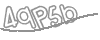

In [4]:
Image.fromarray(np.array(dataset[0], dtype=np.uint8))

In [5]:
labels[0]

'4qp5b'

In [37]:
ch2index = {}
index2ch = {}
index = 0
for label in labels:
    for ch in label:
        if ch not in ch2index.keys():
            ch2index[ch] = index
            index2ch[index] = ch
            index += 1

In [38]:
ch2index

{'4': 0,
 'q': 1,
 'p': 2,
 '5': 3,
 'b': 4,
 'e': 5,
 'k': 6,
 'm': 7,
 'y': 8,
 'z': 9,
 '3': 10,
 'f': 11,
 'u': 12,
 '2': 13,
 'c': 14,
 '7': 15,
 'd': 16,
 'x': 17,
 's': 18,
 'h': 19,
 'v': 20,
 'g': 21,
 '8': 22,
 'n': 23,
 'r': 24,
 'a': 25,
 'w': 26,
 '6': 27,
 'o': 28,
 't': 29,
 '1': 30,
 'l': 31,
 'j': 32,
 '9': 33,
 'i': 34,
 '0': 35}

In [39]:
print("total char type:", len(ch2index))

total char type: 36


In [9]:
y0 = []
y1 = []
y2 = []
y3 = []
y4 = []

for label in labels:
    y0.append(ch2index[label[0]])
    y1.append(ch2index[label[1]])
    y2.append(ch2index[label[2]])
    y3.append(ch2index[label[3]])
    y4.append(ch2index[label[4]])

In [11]:
len(y0)

11303

In [12]:
X_train = np.array(dataset[:10000]).reshape(-1, 40, 100, 1)
y_train = [
    np.array(y0[:10000]),
    np.array(y1[:10000]),
    np.array(y2[:10000]),
    np.array(y3[:10000]),
    np.array(y4[:10000]),
]

In [13]:
X_train.shape

(10000, 40, 100, 1)

In [21]:
X_test = np.array(dataset[10000:]).reshape(-1, 40, 100, 1)
y_test = [
    np.array(y0[10000:]),
    np.array(y1[10000:]),
    np.array(y2[10000:]),
    np.array(y3[10000:]),
    np.array(y4[10000:]),
]

In [22]:
X_test.shape

(1303, 40, 100, 1)

## Train the Network

In [16]:
from keras.layers import Activation, Input, Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
from keras.models import Model
from keras.layers.merge import Concatenate


def build_model():
    input_ = Input(shape=(40, 100, 1))

    # conv layer 1
    model = BatchNormalization()(input_)
    model = Conv2D(64, (5, 5), activation ='relu', padding='same')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 2
    model = BatchNormalization()(model)
    model = Conv2D(128, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)

    # conv layer 3
    model = BatchNormalization()(model)
    model = Conv2D(256, (5, 5), activation ='relu', padding='valid')(model)
    model = MaxPool2D(pool_size=(2, 2))(model)
    model = Dropout(0.5)(model)

    # fully connected layer
    model = Flatten()(model)
    model = Dense(1024, activation='relu')(model)
    model = Dense(512, activation='relu')(model)

    x0 = Dense(36, activation='softmax')(model)
    x1 = Dense(36, activation='softmax')(model)
    x2 = Dense(36, activation='softmax')(model)
    x3 = Dense(36, activation='softmax')(model)
    x4 = Dense(36, activation='softmax')(model)

    x = [x0, x1, x2, x3, x4]

    model = Model(inputs=input_, outputs=x)
    return model

Using TensorFlow backend.


In [17]:
model = build_model()

In [18]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 40, 100, 1)   0                                            
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 40, 100, 1)   4           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 40, 100, 64)  1664        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 20, 50, 64)   0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_norm

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="rmsprop",
              metrics=['accuracy'])

In [20]:
model.fit(X_train, y_train, batch_size=64, epochs=20)

Epoch 1/20
10000/10000 [==============================] - 97s 10ms/step - loss: 17.6341 - dense_3_loss: 3.5153 - dense_4_loss: 3.5181 - dense_5_loss: 3.5418 - dense_6_loss: 3.5162 - dense_7_loss: 3.5428 - dense_3_acc: 0.0678 - dense_4_acc: 0.0766 - dense_5_acc: 0.0701 - dense_6_acc: 0.0690 - dense_7_acc: 0.0603
Epoch 2/20
10000/10000 [==============================] - 94s 9ms/step - loss: 14.2783 - dense_3_loss: 2.6371 - dense_4_loss: 2.7433 - dense_5_loss: 2.9003 - dense_6_loss: 2.9955 - dense_7_loss: 3.0021 - dense_3_acc: 0.2283 - dense_4_acc: 0.2149 - dense_5_acc: 0.1784 - dense_6_acc: 0.1637 - dense_7_acc: 0.1568
Epoch 3/20
10000/10000 [==============================] - 94s 9ms/step - loss: 10.9375 - dense_3_loss: 1.7339 - dense_4_loss: 1.9884 - dense_5_loss: 2.3118 - dense_6_loss: 2.4551 - dense_7_loss: 2.4483 - dense_3_acc: 0.4526 - dense_4_acc: 0.3874 - dense_5_acc: 0.3160 - dense_6_acc: 0.2870 - dense_7_acc: 0.2897
Epoch 4/20
10000/10000 [==============================] - 96s 1

In [25]:
res = model.evaluate(X_test, y_test)

1303/1303 [==============================] - 3s 2ms/step


In [26]:
res[6:]

[0.8879508820754788,
 0.8626247118824002,
 0.8242517262811581,
 0.7789716034876046,
 0.6799693013372005]

## Use in product

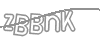

In [27]:
Image.fromarray(np.array(X_test[0].reshape(40, 100), dtype=np.uint8))

In [31]:
res = model.predict(np.array([X_test[0]]).reshape(1, 40, 100, 1))

In [44]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

z b b n k


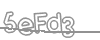

In [45]:
Image.fromarray(np.array(X_test[-1].reshape(40, 100), dtype=np.uint8))

In [46]:
res = model.predict(np.array([X_test[-1]]).reshape(1, 40, 100, 1))

In [47]:
print(index2ch[res[0].argmax(1)[0]], 
      index2ch[res[1].argmax(1)[0]], 
      index2ch[res[2].argmax(1)[0]], 
      index2ch[res[3].argmax(1)[0]], 
      index2ch[res[4].argmax(1)[0]])

5 e f d 5
